# WASP-97

In this notebook, we use *eleanor* to get the raw, corrected and PCA light curves for a target named WASP-97. The target is located in the constellation of Eridanus, which is close to the constellation Reticulum (where WASP-100 is located). We use the target's coordinates to download all the required information with *eleanor* for TESS's Sector 2.

WASP-97 has been confirmed to have an exoplanet in both DACE and the NASA Exoplanet Catalog.


**DACE:** https://dace.unige.ch/dashboard/

**NASA Exoplanet Catalog:** https://exoplanets.nasa.gov/discovery/exoplanet-catalog/

In [1]:
# Connect to Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install the *eleanor* pipeline. We need to install every time the notebook gets disconnected from the Google Drive.

In [2]:
pip install eleanor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
  Created wheel for eleanor: filename=eleanor-2.0.5-py2.py3-none-any.whl size=144466 sha256=71348ea325a81189750f29d176f536abe41cbe3d57202b6827c6f6fd7046

In [3]:
# Import "Image" class to display images in the notebook.
from IPython.display import Image

# Instruct Python to ignore and not display warning messages.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the necessary modules.
import eleanor
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

plt.rcParams['font.size'] = 16   # Set the font size for text.

## Initiating *eleanor.Source*

Choosing the target star and the sector it was observed in. Here we used the coordinates for WASP-97, in Sector 2.


***ISSUE***

We were not able to find any catalogues that included the TIC ID, Gaia ID and coordinates for the new targets. To get that information, we first downloaded the data based on the name of the target. Once we found the coordinates, we commented-out the cells (where the name of the target was used), restarted the notebook and performed the same steps using the ID numbers or coordinates.

### **Getting the coordinates**

In this section, we download the information on our target based on its name. We get the TIC and Gaia ID numbers and coordinates. The cells have been commented-out, as we now have the coordinates, which we use in the next section. We do not need to run these cells again.

In [ ]:
# star = eleanor.Source(name='WASP-97', sector=2)

Most recent sector available =  69
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  2...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  2 now available.


Check the different ID numbers (TIC and Gaia) and coordinates (RA and Dec) from the cross-checking eleanor has done.

In [ ]:
# star.tic, star.coords, star.gaia

(230982885, (24.60440208333333, -55.77209027777778), 4911563216311083392)

Get information on where the target was observed on the TESS CCD cameras.

In [ ]:
# star.sector, star.camera, star.chip

(2, 3, 1)

### **Getting the data using coordinates**

Here we download the data for WASP-97, using the coordinates (acquired from the previous section), for Sector 2.

In [5]:
coordinates = SkyCoord(ra=24.60440208333333, dec=-55.77209027777778, unit=(u.deg, u.deg))

star = eleanor.Source(coords=coordinates, sector=2)

Most recent sector available =  69
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  2...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  2 now available.


In [6]:
star.tic, star.coords, star.gaia

(230982885, (24.60440208333333, -55.77209027777778), 4911563216311083392)

In [7]:
star.sector, star.camera, star.chip

(2, 3, 1)

## Making a light curve

We now have everything we need to make a light curve.

In [9]:
# Creating a PCA light curve for the target star.
data = eleanor.TargetData(star, do_pca=True)

The eleanor light curves are tailored to find transits. So, it's trying to minimise the combined differential photometric precision (noise out of transit). We can do three different background subtractions:

1. 1D postcard background: constant value that is calculated for each postcard frame, masking all the stars in that region.
  - data.bkg_type = 'PC_LEVEL' : keyword = data.flux_bkg
2. 1D TPF (target pixel file) background: constant value calculated for each TPF frame, masking all the stars in that region.
  - 1D TPF background : data.bkg_type = 'TPF_LEVEL' : keyword = data.tpf_flux_bkg
3. 2D background: a model background that the developers created and was downloaded when we created the *eleanor.Source* object.
  - data.bkg_type = 'TPF_2D_LEVEL' : keyword = data.bkg_tpf (post_obj.background2d)


An example of a 2D background is shown in the plot below.

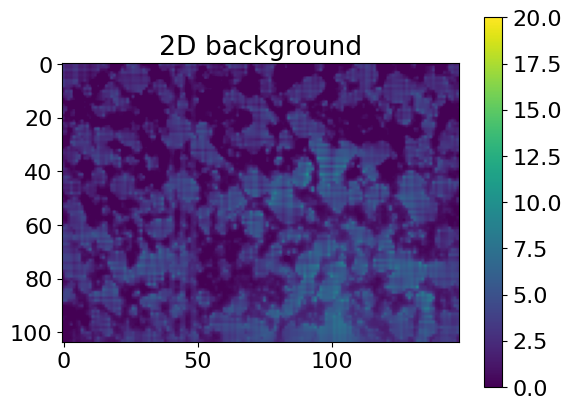

In [10]:
plt.title('2D background')
plt.imshow(data.post_obj.background2d[100], vmin=0, vmax=20)
plt.colorbar();

The bright regions will be used for background subtraction.

Below we can see which background produced the best light curve. The result is "PC_LEVEL", meaning that the 1D level background removed the most systematics.


In [11]:
data.bkg_type

'PC_LEVEL'

Below we plot the background flux (energy received per unit area) over time (BJD).



---


**BJD:** Barycentric Julian Date, the Julian Date corrected for differences in the Earth's position with respect to the barycentre of the Solar System. Due to the finite speed of light, the time an astronomical event is observed depends on the changing position of the observer in the Solar System. Before multiple observations can be combined, they must be reduced to a common, fixed, reference location. This correction also depends on the direction to the object or event being timed.

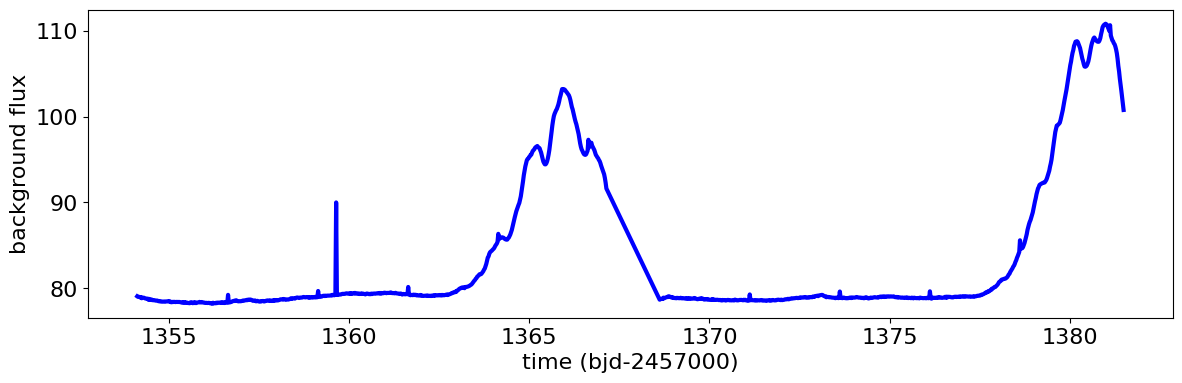

In [12]:
plt.figure(figsize=(14, 4))
plt.plot(data.time, data.post_obj.bkg, 'b', lw=3)        # Changed the line colour from 'w' to 'b' to see it.
plt.xlabel('time (bjd-2457000)')
plt.ylabel('background flux');

*eleanor* also tests an entire suite of apertures. The aperture selected by *eleanor* also minimises CDPP. So, by testing all the different apertures with the different backgrounds, we hope to get the cleanest light curve for transits as possible. The aperture over the selected target is shown below.

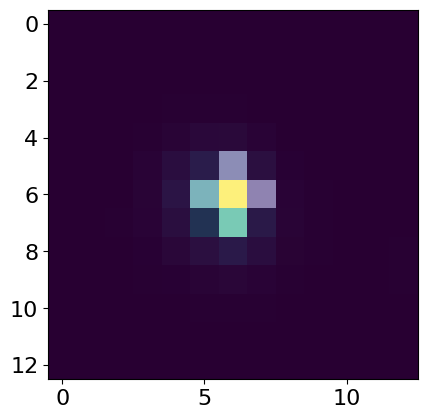

In [13]:
plt.imshow(data.tpf[100])
plt.imshow(data.aperture, alpha=0.4, cmap='Greys_r');

The brighter/more yellow areas show the location of the star. The further away we get from the star the less energy we can receive from those areas.

We can also use the *eleanor.Visualise* class. We pass in the data from the *eleanor.TargetData* object and can overplot the contour, set colours, etc.

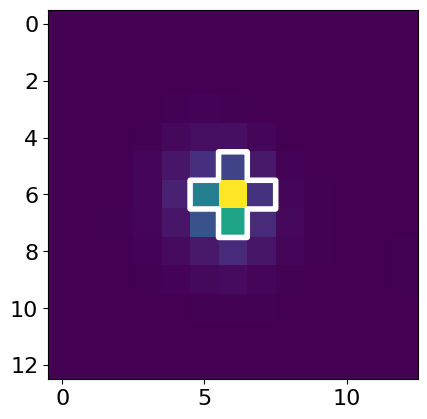

In [14]:
vis = eleanor.Visualize(data)
fig = vis.aperture_contour()
plt.gca().invert_yaxis()

## Plotting the light curve

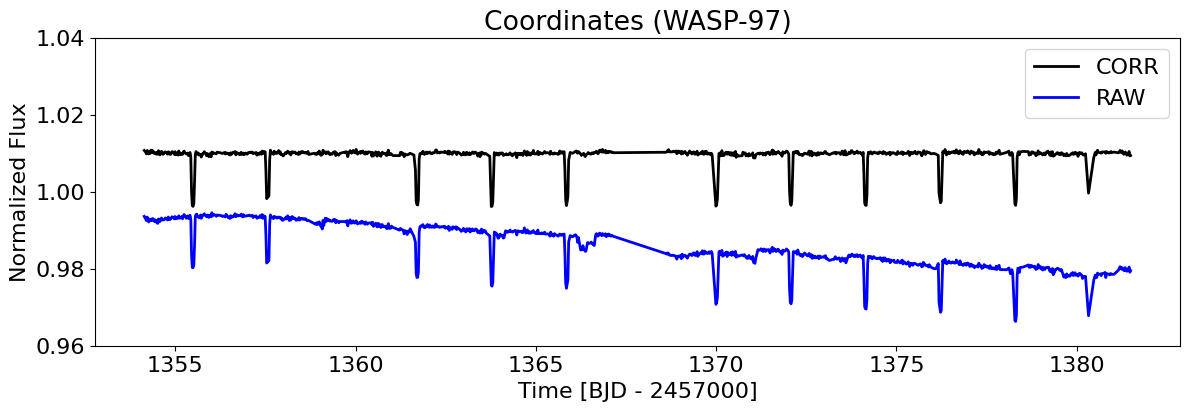

In [15]:
q = data.quality == 0         # Mask bad cadences with the quality flags set by the developers.

plt.figure(figsize=(14,4))    # Set figure size.

#plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.005, 'b', lw=3, label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.01, 'k', lw=2, label='CORR')

# Moved this line of code from the top to get a more consistent legend.
plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) - 0.015, 'b', lw=2, label='RAW')

plt.ylim(0.96, 1.04)               # This line is used in the tutorial. It just changes the limits of the y-axis.
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('Coordinates (WASP-97)')
plt.legend();

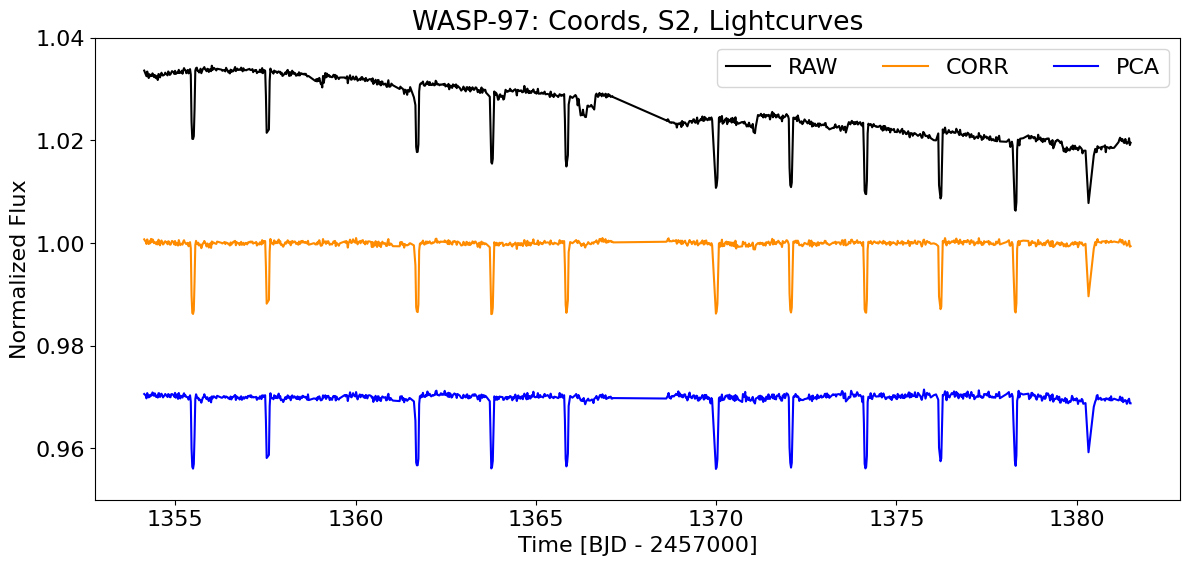

In [16]:
q = data.quality == 0         # Mask bad cadences witht he quality flags det by the developers.

plt.figure(figsize=(14,6))    # Set figure size.

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.025, 'k', label='RAW')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]), 'darkorange', label='CORR')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q])-0.03, 'b', label='PCA')
#plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.0, 'b')
plt.ylim(0.95, 1.04)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-97: Coords, S2, Lightcurves')
#plt.legend(loc='best');
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.legend(ncol=3);

By calling *eleanor.to_lightkurve()*, we will get a *lightkurve.LightCurve* object. We can specify which flux we want passed into the object.

This is also used to download the light curves from the TASOC and Oelkers & Stassun pipelines, for comparison.


In [17]:
lc = data.to_lightkurve(flux=data.corr_flux)

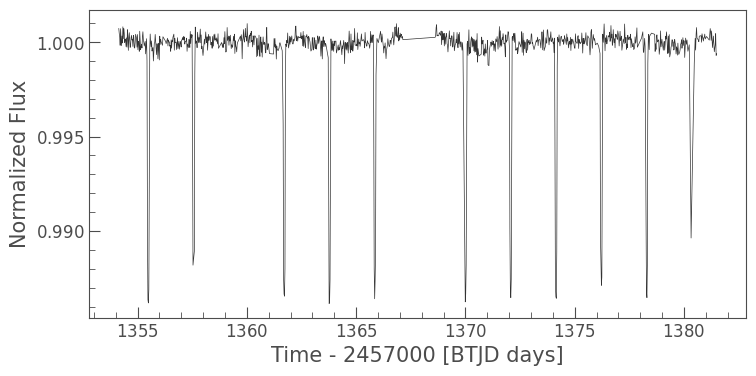

In [18]:
lc.normalize().plot();

## Crossmatching

Within *eleanor*, we also have tools to see if our target has a light curve produced by the TASOC team (TESS Asteroseismic Consortium), Oelkers & Stassun difference imaging pipeline, or was observed at a 2-minute cadence.

In [19]:
crossmatch = eleanor.Crossmatch(data)

To check for 2-minute data, we use *lightkurve* behind the scenes.

In [20]:
crossmatch.two_minute()

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 02,2018,SPOC,120,230982885,0.0
1,TESS Sector 02,2018,TESS-SPOC,1800,230982885,0.0


Because this returns a *lightkurve.SearchResult* object, we can download the data product right from there and go about using the other *lightkurve* tools.


---

To check out the TASOC pipeline, we use *astro query* behind the scenes to get the data products from MAST (Mikulski Archive for Space Telescopes) and plot the light curve. They have their own quality flags so we can use those.

In [21]:
crossmatch.tasoc_lc()

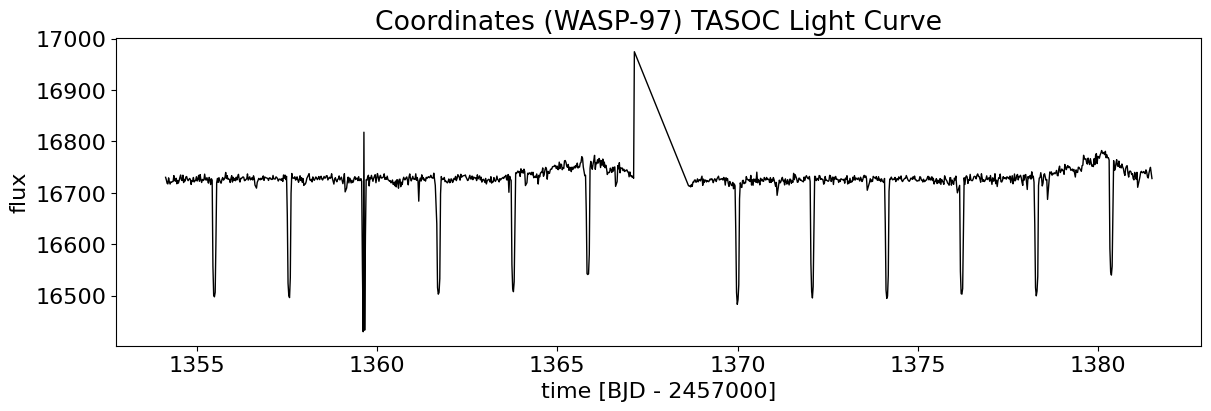

In [22]:
plt.figure(figsize=(14,4))
q = crossmatch.tasoc_pixel_quality == 0      # Can use TASOC quality flags.
plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q], 'k', lw=1)
# plt.ylim(13300,13600)
plt.title('Coordinates (WASP-97) TASOC Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('flux');

There is a major spike within the light curve. The feature could be a result of TESS data downlink and re-pointing to the same position in the sky, or the telescope losing fine-pointing.

Then we check the Oelkers & Stassun light curves (it should be noted these light curves are in magnitudes, which is why they look

upside-down).

In [23]:
crossmatch.oelkers_lc()

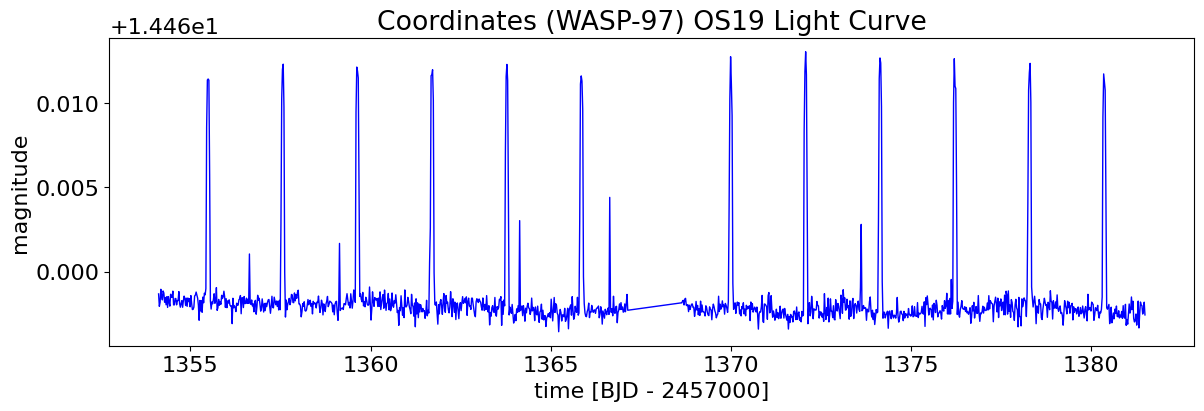

In [24]:
plt.figure(figsize=(14,4))
plt.plot(crossmatch.os_time, crossmatch.os_mag, 'b', lw=1)
plt.title('Coordinates (WASP-97) OS19 Light Curve')
plt.xlabel('time [BJD - 2457000]')
plt.ylabel('magnitude');

## Comparison plot

We can now plot all light curves together and compare.


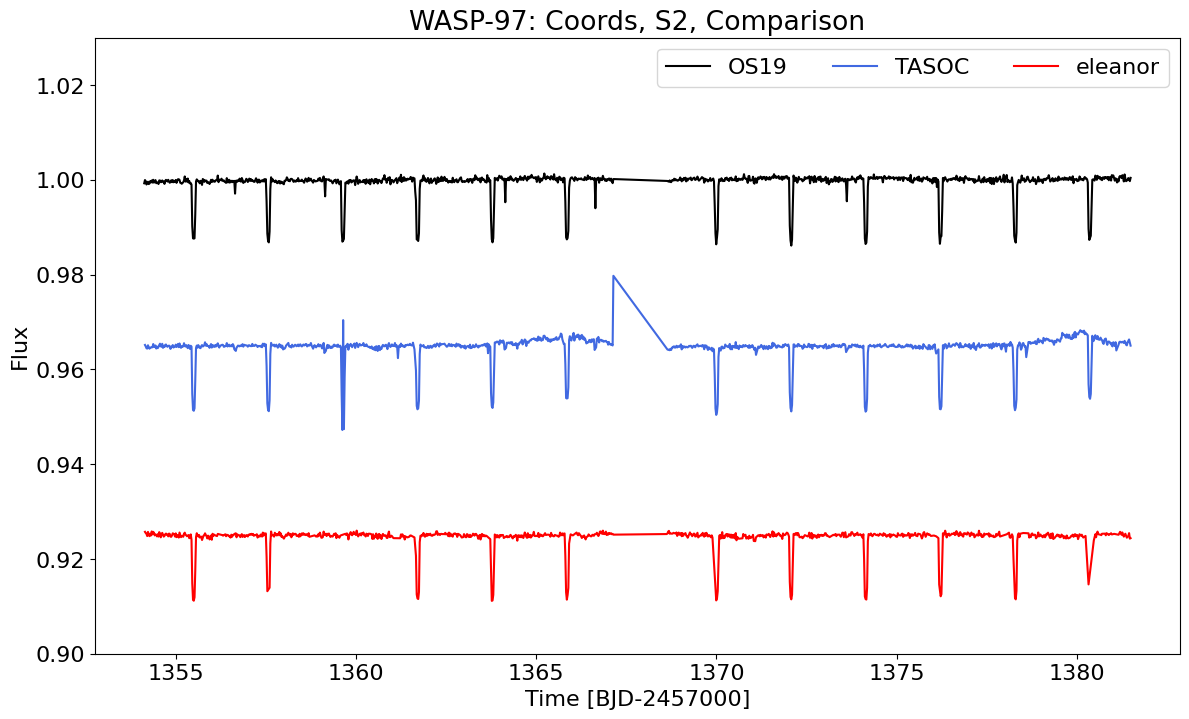

In [25]:
plt.figure(figsize=(14,8))

e = data.quality == 0

plt.plot(crossmatch.os_time, 10**(-0.4*crossmatch.os_mag)/np.nanmedian(10**(-0.4*crossmatch.os_mag)), 'k', label='OS19')

plt.plot(crossmatch.tasoc_time[q], crossmatch.tasoc_flux_raw[q]/np.nanmedian(crossmatch.tasoc_flux_raw[q])-0.035, 'royalblue', label='TASOC')

plt.plot(data.time[e], data.corr_flux[e]/np.nanmedian(data.corr_flux[e])-0.075, 'red', label='eleanor')

plt.legend(ncol=3)
plt.title('WASP-97: Coords, S2, Comparison')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Flux')
plt.ylim(0.9, 1.03);

Here we see that we get the same number of transits from all pipelines (11 dips) and they all happen on the same time coordinate. There is one transit around time=1360, which appears in TASOC and OS19, but not in *eleanor*.

Nevertheless, the majority of transits from the other pipelines have been detected by *eleanor*. This proves that *eleanor* can produce accurate light curves for WASP-97, as we can still determine certain features of the exoplanet (such as orbital period and size).